In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import math
import multiprocessing
from item.item_list import (
    ItemList,
    Item
)
from nlp.utils import (
    plot_histogram,
    get_completetext,
    plot_wordcloud,
    print_statistics,
    groups_frequency_sort)
from nlp.grouping import (
    get_groups,
    get_groups_size,
    get_unigram_groups,
    get_two_tokens_groups,
    get_first_token_groups,
    get_bigram_groups,
    get_first_two_groups,
    groups_frequency_sort
)
from nlp.pos_tagging import (
    get_tokens_tags
)
from nlp.word_embeddings import (
    load_word_embeddings,
    get_item_embedding,
    get_items_embeddings,
    get_items_similarities
)

In [2]:
file = './results/baseline+embeddings/embeddings-norm50_SUB+MED_hdbscan.pkl'
a_file = open(file, "rb")
output = pickle.load(a_file)

In [3]:
intrasimilarity_file = "./results/baseline+embeddings/intra_similarity_norm50_SUB+MED_hdbscan.pkl"
a_file = open(intrasimilarity_file, "rb")
intra_similarity = pickle.load(a_file)

In [4]:
intra_similarity_mean = [similarity['mean'] for group, similarity in intra_similarity.items()]
intra_similarity_min = [similarity['min'] for group, similarity in intra_similarity.items()]

In [5]:
similarities_values = list(intra_similarity_mean)

In [6]:
len(similarities_values)

25122

In [7]:
similarities_values.count(0)

2780

In [8]:
similarities_values.count(1)

9317

In [25]:
100*(similarities_values.count(0)/len(similarities_values))

11.065997930101107

In [10]:
print_statistics(similarities_values)

Mean: 0.7818333862708567
First quartile: 0.6742811610142816
Median: 0.9881075987199947
Third quartile: 1.0
Std: 0.3375522161398726
Var: 0.11394149862093926
Max: 1.0
Min: -0.36995930438869395


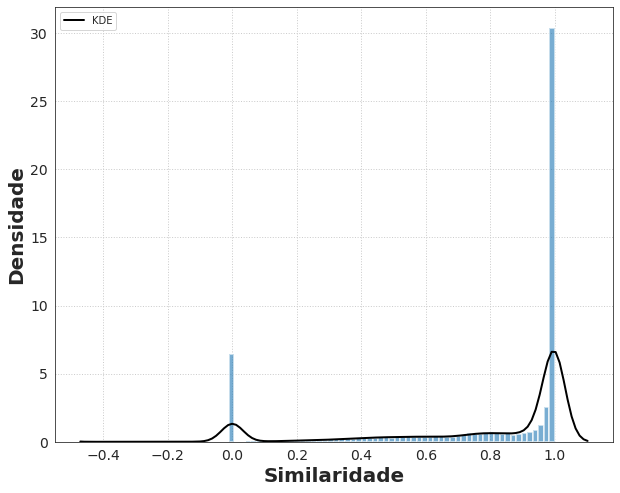

<Figure size 432x288 with 0 Axes>

In [11]:
import seaborn as sns

sns.set_style("white")

fig, (axis1) = plt.subplots(figsize=(10,8))
x_label = 'Similaridade'
y_label = 'Densidade'

sns.distplot(similarities_values, bins=80, kde_kws={"color": "k", "lw": 2, "label": "KDE"},
            hist_kws={"linewidth": 2, "alpha": 0.6})

axis1.set_xlabel(x_label, fontsize=20, weight='bold')
axis1.set_ylabel(y_label, fontsize=20, weight='bold')

plt.grid(axis='both', linestyle=':', linewidth=1.0)
# axis1.legend(loc='upper right')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.show()
plt.clf()

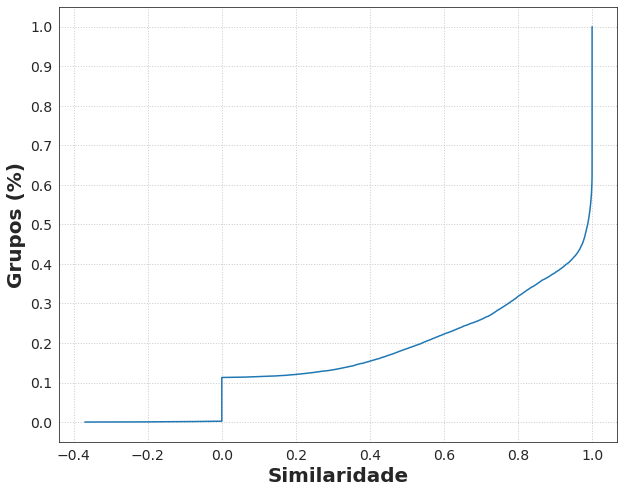

<Figure size 432x288 with 0 Axes>

In [12]:
from statsmodels.distributions.empirical_distribution import ECDF

# fit a cdf
ecdf = ECDF(similarities_values)

fig, (axis1) = plt.subplots(figsize=(10,8))
x_label = 'Similaridade'
y_label = 'Grupos (%)'

plt.plot(ecdf.x, ecdf.y)

axis1.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

axis1.set_xlabel(x_label, fontsize=20, weight='bold')
axis1.set_ylabel(y_label, fontsize=20, weight='bold')

plt.grid(axis='both', linestyle=':', linewidth=1.0)
# axis1.legend(loc='upper right')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.show()
plt.clf()

In [13]:
bad_groups = {}
count = 0

for group, similarity in intra_similarity.items():
    if similarity['mean'] <= 0:
        bad_groups[group] = len(output[group])

In [14]:
good_groups = {}
count = 0

for group, similarity in intra_similarity.items():
    if similarity['mean'] >= 0.75:
        good_groups[group] = len(output[group])

In [15]:
len(bad_groups)

2832

In [16]:
len(good_groups)

17956

In [17]:
bad_groups_name_size = groups_frequency_sort(bad_groups)

In [18]:
good_groups_name_size = groups_frequency_sort(good_groups)

In [19]:
num_items = sum([len(items) for group, items in output.items()])

In [20]:
num_items

1507674

In [21]:
sum([x for group, x in bad_groups_name_size])

39482

In [22]:
100*(sum([x for group, x in bad_groups_name_size])/num_items)

2.618735880568346

In [23]:
100*(sum([x for group, x in good_groups_name_size])/num_items)

75.04918171965558

In [24]:
bad_groups_name_size[:50]

[('clips_0', 2181),
 ('scalp_1', 1604),
 ('especular_0', 1326),
 ('coletor_2', 1057),
 ('toner_3', 776),
 ('protetor_0', 741),
 ('soldavel_0', 675),
 ('levomepromazina_0', 555),
 ('desinfetante_0', 554),
 ('tnt_1', 481),
 ('fixador_0', 477),
 ('cinarizina_0', 420),
 ('cilostazol_1', 396),
 ('anlodipino_2', 377),
 ('cap_0', 364),
 ('diazepan_0', 364),
 ('nifedipina_0', 362),
 ('otoscopio_2', 345),
 ('clonazepan_1', 344),
 ('formocresol_1', 341),
 ('equipar_9', 330),
 ('jelco_0', 307),
 ('norfloxacino_0', 305),
 ('paramonoclorofenol_1', 303),
 ('glimepirida_0', 289),
 ('termico_0', 285),
 ('eugenol_1', 274),
 ('tonner_0', 273),
 ('secnidazol_0', 263),
 ('gliter_0', 242),
 ('mussarela_1', 240),
 ('tee_3', 239),
 ('gelco_0', 226),
 ('negatoscopio_2', 218),
 ('levofloxacino_0', 213),
 ('selante_1', 210),
 ('afastador_1', 207),
 ('amoxilina_2', 207),
 ('calcador_1', 205),
 ('thinner_0', 205),
 ('acebrofilina_0', 196),
 ('plug_2', 196),
 ('tioridazina_1', 194),
 ('glicazida_1', 191),
 ('propa